# 선형 회귀분석

## 선형 회귀분석의 개요

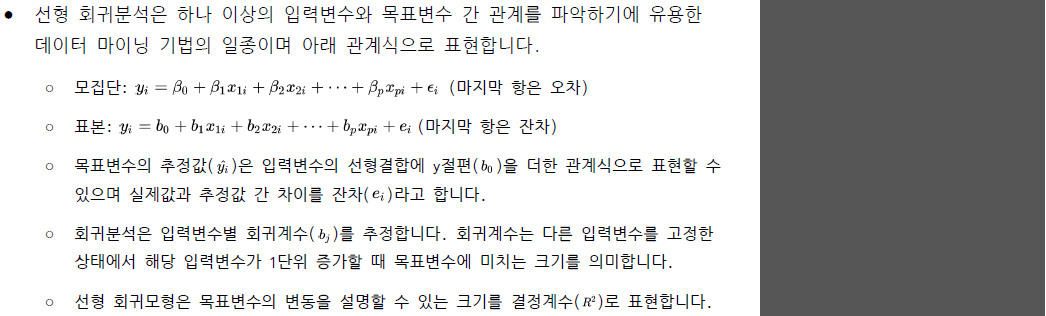

## 선형 회귀분석의 기본 가정

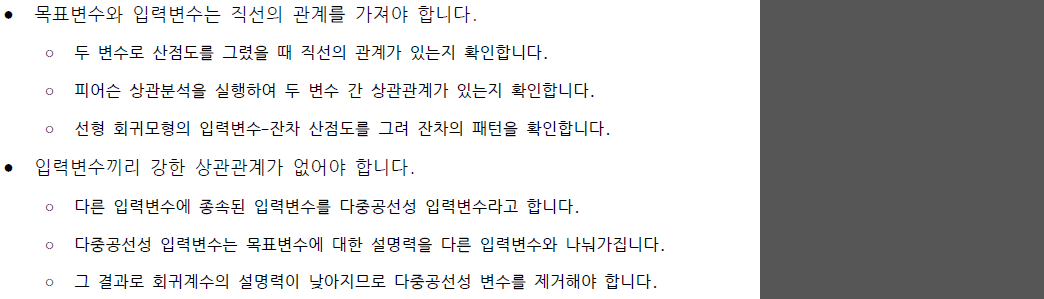

## 선형 회귀모형 진단

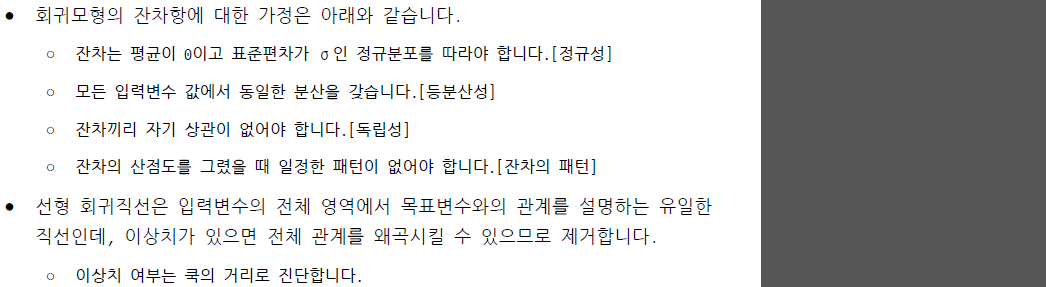

## [참고] 선형 회귀모형의 시각적 이해

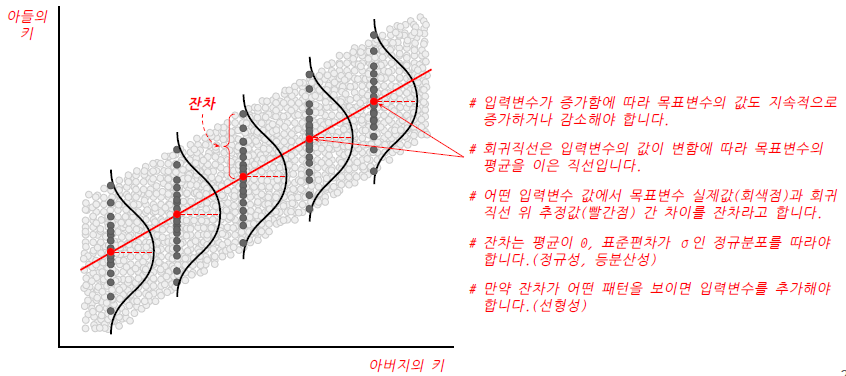

## 선형 회귀분석 프로세스

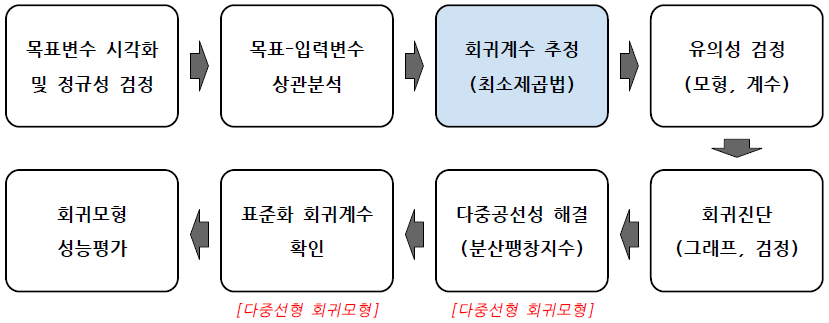

## 관련 라이브러리 호출

### ● 관련 라이브러리를 호출합니다

In [1]:
import os
import joblib
import numpy as np
import pandas as pd

### ● 실수를 출력할 소수점 자리수를 설정합니다

In [2]:
%precision 3
pd.options.display.precision = 3

### ● 통계 관련 라이브러리를 호출합니다

In [3]:
from scipy import stats
import pingouin as pg

### ● 시각화 및 통계 분석 관련 모듈을 호출합니다

In [4]:
from GraphicSetting import *
import HelloDataScience as hds

## 작업 경로 확인 및 변경

### ● 현재 작업 경로를 확인합니다

In [7]:
os.getcwd()

'D:\\python\\PythonAdvanced-main\\data'

### ● data 폴더로 작업 경로를 변경합니다

In [8]:
os.chdir('../data')

### ● 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다

In [9]:
os.listdir()

['KBO_Hitter_2021.z',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z',
 'Used_Cars_Price_Prep.z']

## 실습 데이터셋 준비

### ● z 파일을 릭고 데이터프레임 df를 생성합니다

In [13]:
df = joblib.load(filename = 'Used_Cars_Price_Prep.z')

### ● df의 정보를 확인합니다

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     1251 non-null   int64 
 1   Age       1251 non-null   int64 
 2   KM        1251 non-null   int64 
 3   FuelType  1251 non-null   object
 4   HP        1251 non-null   int64 
 5   MetColor  1251 non-null   object
 6   Doors     1251 non-null   int64 
 7   Weight    1251 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 78.3+ KB


### ● df의 처음 5행을 출력합니다

In [15]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Doors,Weight
0,13500,23,46986,Diesel,90,1,3,1165
1,13750,23,72937,Diesel,90,1,3,1165
2,13950,24,41711,Diesel,90,1,3,1165
3,14950,26,48000,Diesel,90,0,3,1165
4,13750,30,38500,Diesel,90,0,3,1170


### ● y절편 역할을 수행할 상수 1을 df의 두 번째 열로 삽입합니다

In [16]:
df.insert(loc = 1, column = 'const', value = 1)

In [32]:
df.head()

,Price,const,Age,KM,HP,MetColor,Doors,Weight,Petrol
0,13500,1,23,46986,90,1,3,1165,0
1,13750,1,23,72937,90,1,3,1165,0
2,13950,1,24,41711,90,1,3,1165,0
3,14950,1,26,48000,90,0,3,1165,0
4,13750,1,30,38500,90,0,3,1170,0


## 범주형 입력변수의 더미변수 변환

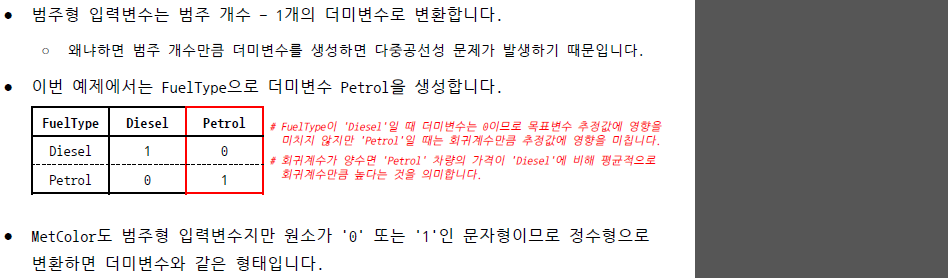

## 더미변수 생성

### ● 범주형 입력변수로 더미변수를 생성합니다

In [20]:
df = pd.get_dummies(data = df, columns = ['FuelType'], drop_first = True)

KeyError: "None of [Index(['FuelType'], dtype='object')] are in the [columns]"

### ● df의 처음 10행을 출력합니다

In [21]:
df.head(n = 10)

,Price,const,Age,KM,HP,MetColor,Doors,Weight,Petrol
0,13500,1,23,46986,90,1,3,1165,0
1,13750,1,23,72937,90,1,3,1165,0
2,13950,1,24,41711,90,1,3,1165,0
3,14950,1,26,48000,90,0,3,1165,0
4,13750,1,30,38500,90,0,3,1170,0
5,12950,1,32,61000,90,0,3,1170,0
6,12950,1,23,71138,69,0,3,1105,0
7,12950,1,29,9750,97,1,3,1100,1
8,14950,1,26,32692,97,1,3,1100,1
9,14950,1,23,10000,97,1,3,1100,1


### ● 더미변수명을 변경합니다

In [22]:
df = df.rename(columns = {'FuelType_Petrol': 'Petrol'})

### ● df의 열별 자료형을 확인합니다

In [23]:
df.dtypes #uint8 : 부호가 없는 1byte

Price        int64
const        int64
Age          int64
KM           int64
HP           int64
MetColor    object
Doors        int64
Weight       int64
Petrol       uint8
dtype: object

### ● 더미변수로 변환할 문자형 열이름으로 리스트를 생성합니다

In [26]:
cols = ['MetColor'] #[참고] 원소가 '0' 또는 '1'인 문자형 변수는 자료형을 정수형으로 변환해주어도 더미변수로 -
# 변환한 것과 같은 결과를 얻을 수 있습니다.

### ● 지정한 변수를 정수형으로 일괄 변환합니다

In [27]:
df[cols] = df[cols].astype(np.uint8) # [참고] 'uint8'로 지정해도 같은 결과를 반환합니다

### ● df의 열별 자료형을 확인합니다

In [28]:
df.dtypes

Price       int64
const       int64
Age         int64
KM          int64
HP          int64
MetColor    uint8
Doors       int64
Weight      int64
Petrol      uint8
dtype: object

## 실습 데이터셋 분할

### ● 관련 라이브러리를 호출합니다

In [31]:
from sklearn.model_selection import train_test_split

### ● 전체 데이터셋의 70%를 훈련셋, 30%를 시험셋으로 분할합니다

In [32]:
train_test_split(df, test_size = 0.3, random_state = 0)

[      Price  const  Age     KM   HP  MetColor  Doors  Weight  Petrol
 1116   9950      1   80  69904  110         0      5    1070       1
 65    13950      1   35  59500   69         1      3    1110       0
 412    9950      1   55  27500   97         1      3    1025       1
 1210   8950      1   71  47633  110         1      5    1075       1
 1219   8500      1   78  43622   86         1      4    1000       1
 ...     ...    ...  ...    ...  ...       ...    ...     ...     ...
 763    7750      1   68  53000   86         0      3    1015       1
 835   10900      1   57  33535  110         0      4    1035       1
 1216   8250      1   69  44826  110         0      5    1075       1
 559    8950      1   61  82115  110         1      3    1055       1
 684   10450      1   61  63000   86         0      3    1050       1
 
 [875 rows x 9 columns],
      Price  const  Age      KM   HP  MetColor  Doors  Weight  Petrol
 711   8250      1   67   60000   86         0      4    1030  

### ● 훈련셋의 목표변수 평균을 확인합니다

In [33]:
trSet, teSet = train_test_split(df, test_size = 0.3, random_state = 0)

In [34]:
trSet['Price'].mean()

9732.848

### ● 시험셋의 목표변수 평균을 확인합니다

In [35]:
teSet['Price'].mean()

9625.545

## 입력변수와 목표변수 분리

### ● 목표변수명을 변수에 할당합니다

In [38]:
yvar = 'Price'

### ● 훈련셋을 목표변수 벡터와 입력변수 행렬로 분리합니다

In [39]:
trReal = trSet[yvar].copy()
trSetX = trSet.drop(columns = [yvar])

### ● 시험셋을 목표변수 벡터와 입력변수 행렬로 분리합니다

In [40]:
teReal = teSet[yvar].copy()
teSetX = teSet.drop(columns = [yvar])

## 선형 회귀계수 추정: 최소제곱법(ordinary least square)

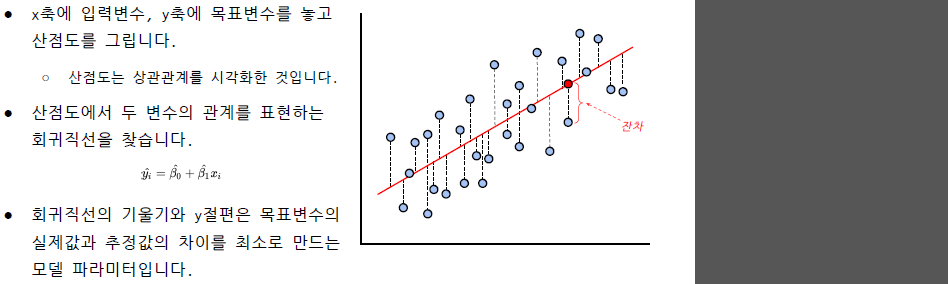

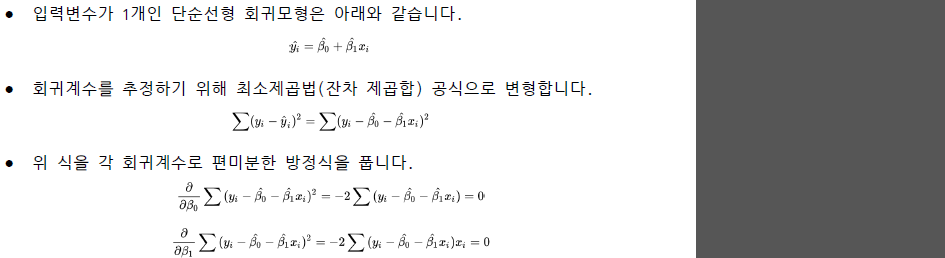

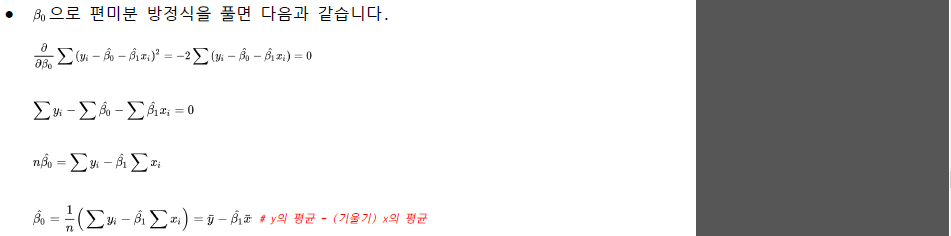

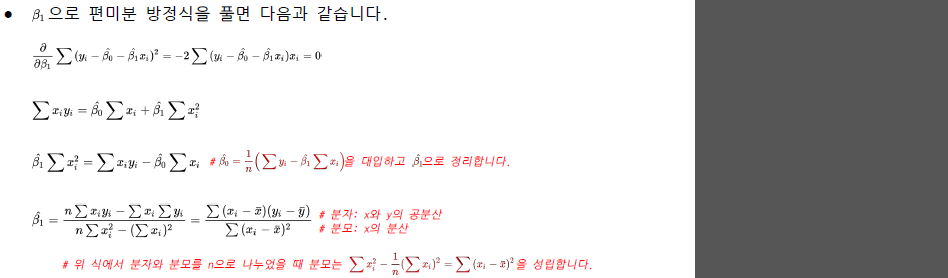

## 선형 회귀모형의 유의성 검정

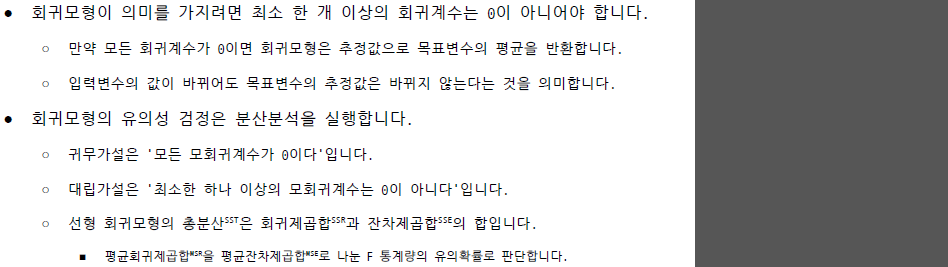

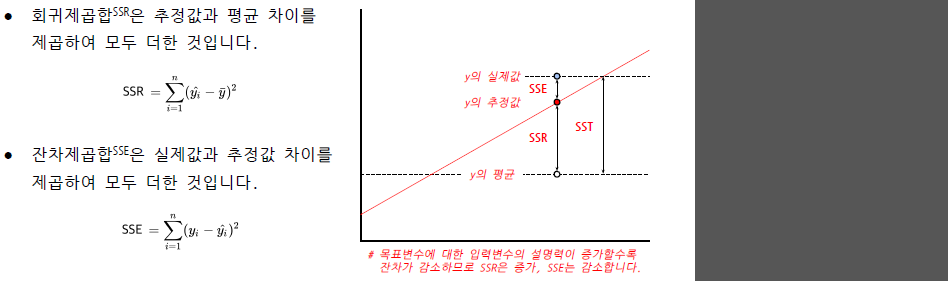

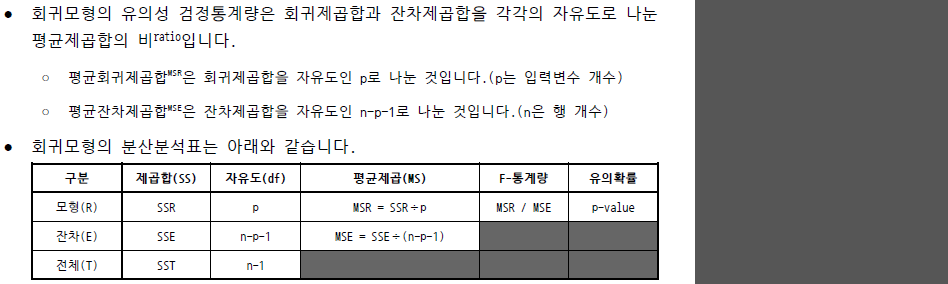

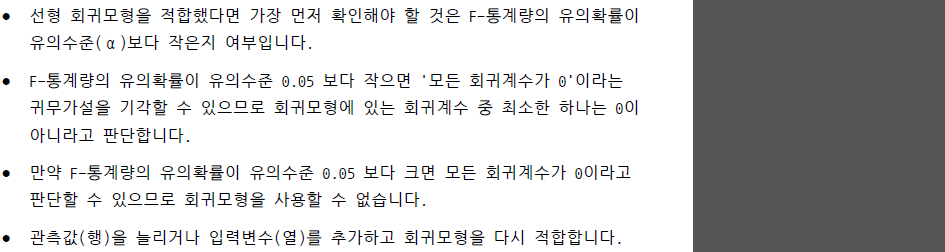

## 선형 회귀계수의 유의성 검정

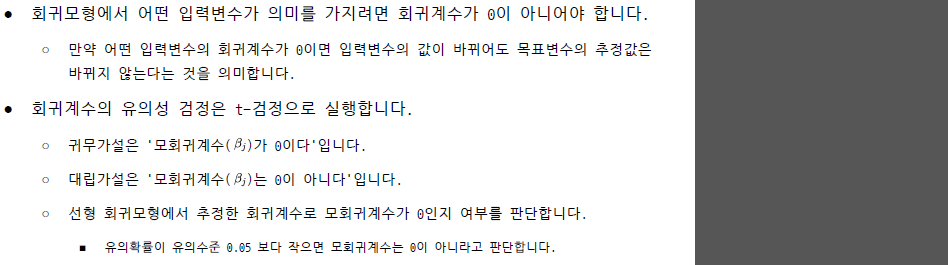

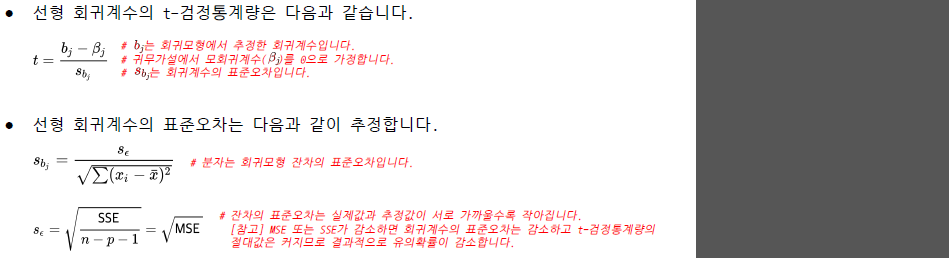

## 결정계수

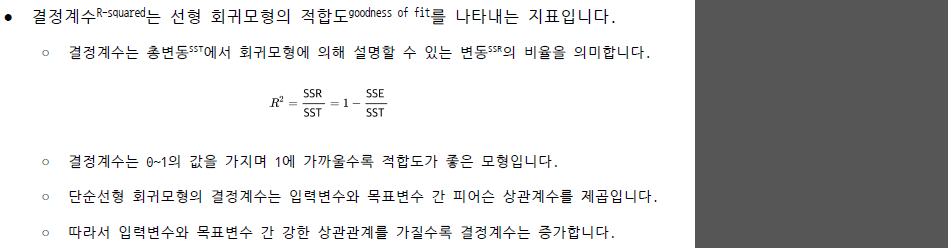

## [참고] 단순선형 회귀모형의 결정계수

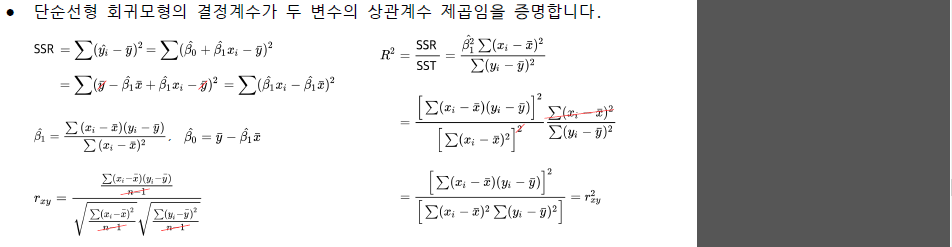

## 조정된 결정계수

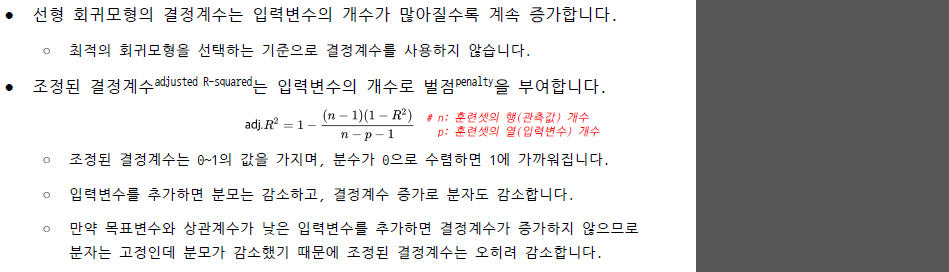

## 선형 회귀모형 적합 함수 생성

### ● 관련 라이브러리를 호출합니다

In [42]:
import statsmodels.api as sa

### ● 선형 회귀모형을 반환하는 함수를 생성합니다

In [57]:
def ols(y, X):
    model = sa.OLS(endog = y, exog = X)
    return model.fit()

## 선형 회귀모형 적합 및 결과 확인

### ● 훈련셋으로 선형 회귀모형을 적합하고 결과를 확인합니다

In [43]:
# 훈련셋으로 선형 회귀모형을 적합합니다.
fit1 = ols(y = trReal, X = trSetX)

NameError: name 'ols' is not defined

In [44]:
# fit1 모형의 적합 결과를 확인합니다.
fit1.summary()

NameError: name 'fit1' is not defined

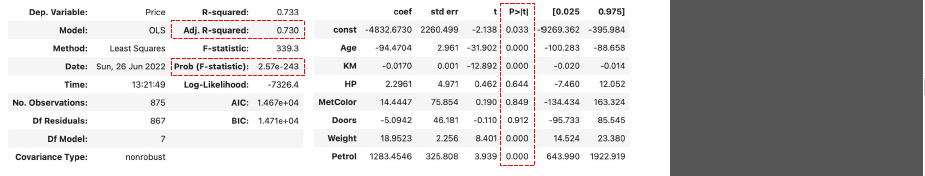

## 회귀진단: 잔차 가정 확인

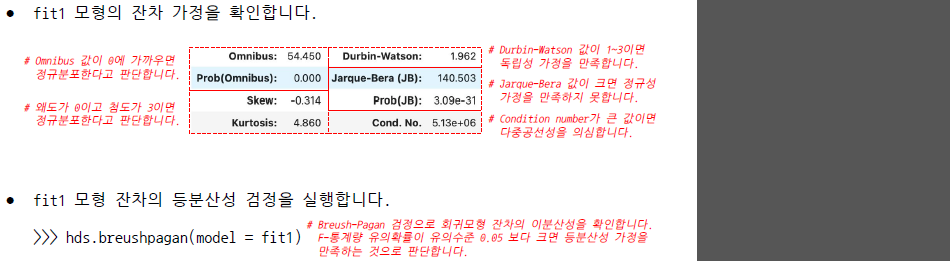

## 회귀진단: 잔차 그래프

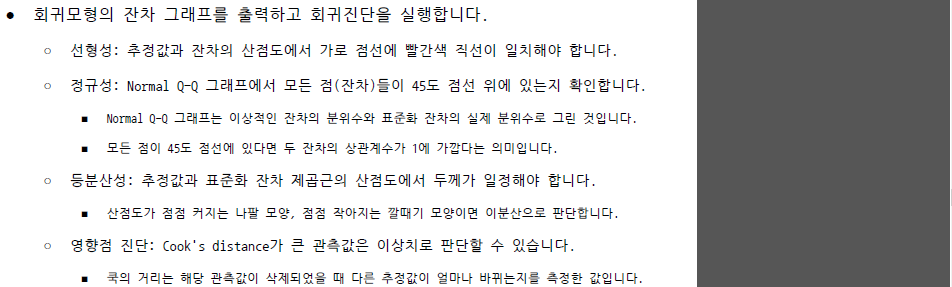

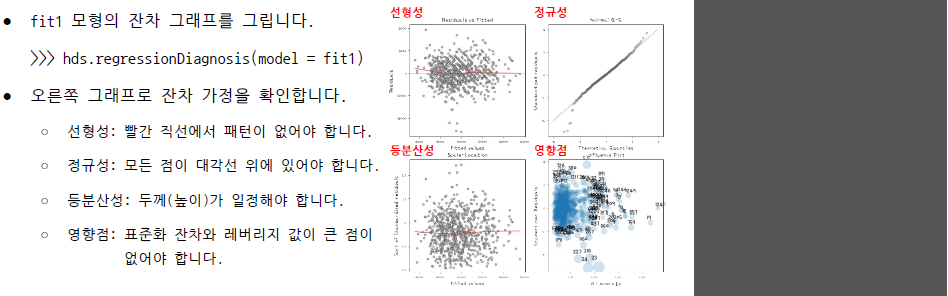

## 회귀진단 : 잔차의 정규성 검정

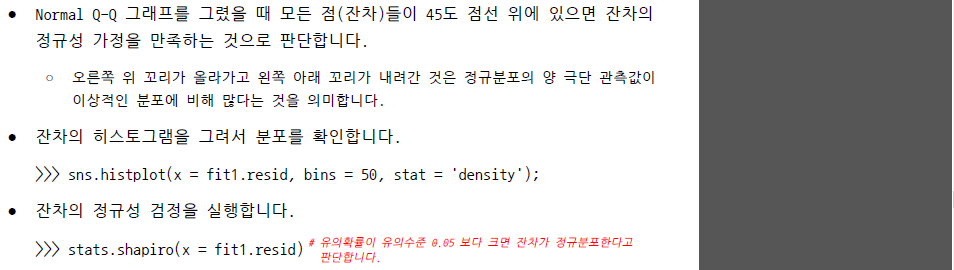

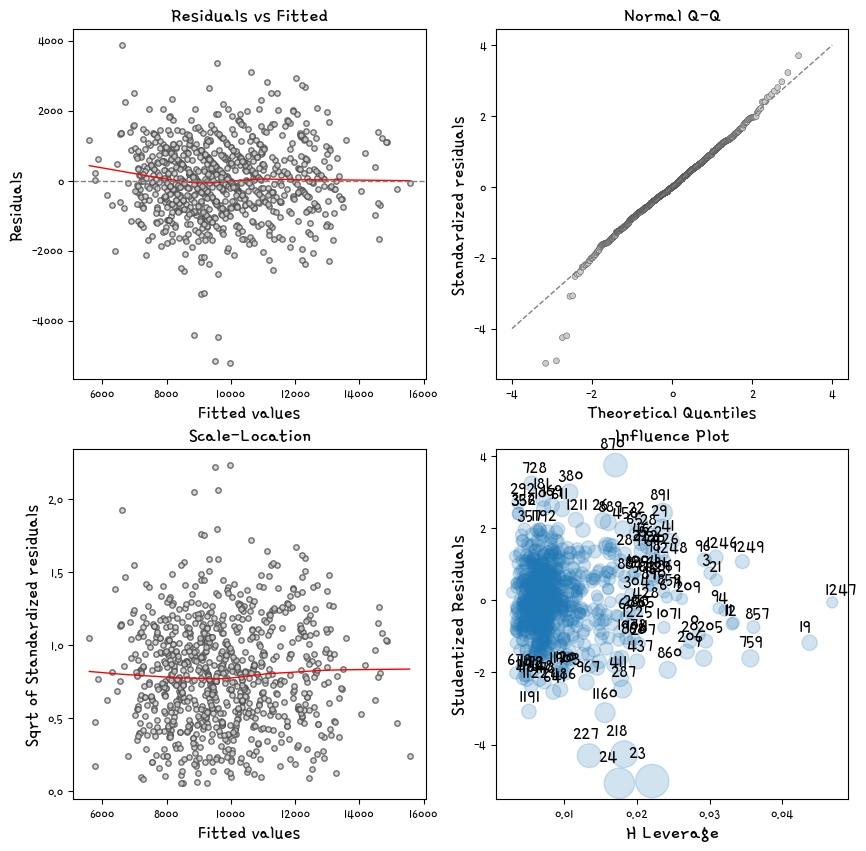

In [62]:
# fit1 모형의 잔차 그래프를 그립니다.
hds.regressionDiagnosis(model = fit1)

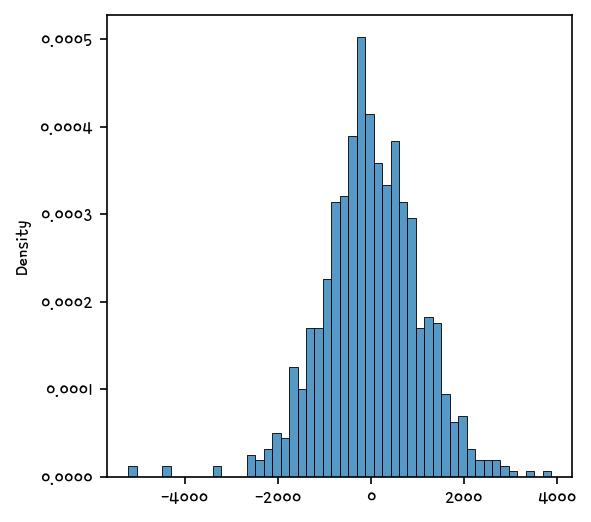

In [65]:
# 잔차의 히스토그램을 그려서 분포를 확인합니다.
sns.histplot(x = fit1.resid, bins = 50, stat = 'density'); #fit1.resid:fit1의 잔차를 의미

In [64]:
# 잔차의 정규성 검정을 실행합니다.
stats.shapiro(x = fit1.resid)

ShapiroResult(statistic=0.9833132028579712, pvalue=1.928031068132441e-08)

## 회귀진단: 잔차의 독립성 검정

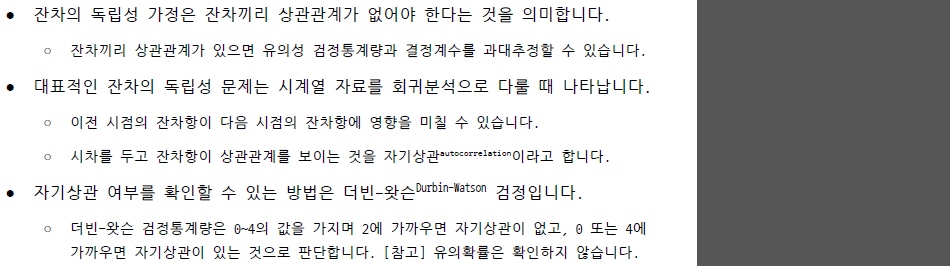

## [참고] 더빈-왓슨 검정

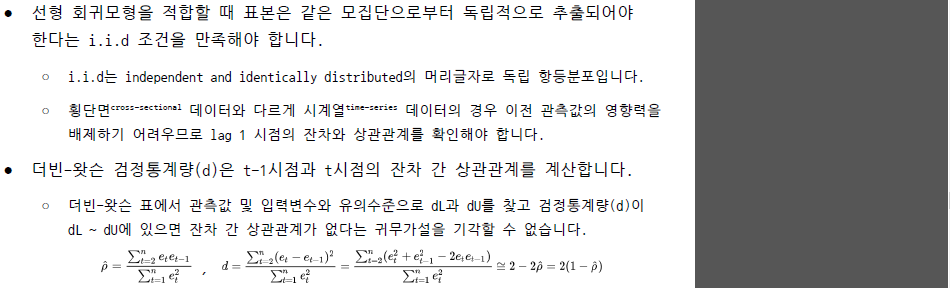

## [참고] 영향점 판단 기준

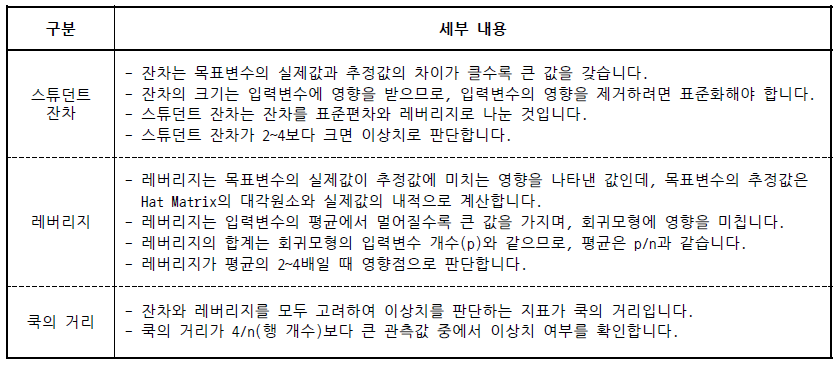

## [참고] 영향점 확인

### ● 훈련셋의 관측값마다 영향점 정보를 갖는 데이터프레임을 생성합니다

In [47]:
aug = hds.augment(model = fit1)

NameError: name 'fit1' is not defined

In [48]:
# aug의 처음 5행을 출력합니다.
aug.head() # 목표변수 실제값, 추정값(fitted), 잔차(resid), 레버리지(hat), 해당 관측값을 제거한 모형의 잔차 표준편차 -
# 추정값(sigma), 쿡의 거리(cooksd) 및 표준화잔차(std_resid)를 출력합니다

NameError: name 'aug' is not defined

In [69]:
# 스튜던트 잔차의 절대값이 3을 초과하는 행 개수를 확인합니다.
aug['std_resid'].abs().gt(3).sum()

8

In [70]:
# 레버리지 평균을 계산합니다.
hatAvg = aug['hat'].mean()
hatAvg

0.009

In [49]:
# 레버리지 평균의 3배를 초과하는 행 개수를 확인합니다.
aug['hat'].gt(hatAvg * 3).sum()

NameError: name 'aug' is not defined

### ● 훈련셋에 쿡의 거리가 4/n(행 개수) 초과 여부를 Out 열로 추가합니다

In [50]:
trSetX['out']=np.where(aug['cooksd'].gt(4/trSetX.shape[0]),'1', '0') # ?????

NameError: name 'aug' is not defined

### ● 훈련셋의 Age와 Price로 산점도를 그리고 Out으로 채우기 색을 다르게 설정합니다

In [51]:
sns.scatterplot(data = trSetX, x = 'Age', y = trReal, hue = 'Out',
               s = 15, alpha = 0.5, palette = ['silver', 'red']);

ValueError: Could not interpret value `Out` for parameter `hue`

## 훈련셋에서 이상치 제거

### ● 훈련셋에서 Out의 원소별 빈도수를 확인합니다

In [52]:
# 훈련셋의 행 개수 n을 생성합니다.
n = trSet.shape[0]

### ● 훈련셋에서 이상치인 행이름을 outs에 할당합니다

In [53]:
# 쿡의 거리가 4/n(행 개수)를 초과하면 True, 미만이면 False인 원소를 갖는 
# 부울형 시리즈 locs를 생성합니다.
locs = aug['cooksd'].gt(4/n)

NameError: name 'aug' is not defined

In [54]:
# 쿡의 거리가 4/n(행 개수)를 초과하는 원소 개수를 확인합니다.
locs.sum()

NameError: name 'locs' is not defined

### ● 훈련셋에서 이상치인 행이름으로 행을 제거합니다

In [82]:
# 훈련셋에서 locs가 True(이상치)인 행을 제거합니다.
trReal = trReal.loc[~locs]
trSetX = trSetX.loc[~locs]

In [83]:
# 이상치를 제거한 훈련셋의 행 개수를 확인합니다.
trSetX.shape[0]

818

## 선형 회귀모형 재적합 및 결과 확인

### ● 이상치를 제거한 훈련셋으로 선형 회귀모형을 적합합니다

In [55]:
# 이상치를 제거한 훈련셋으로 선형 회귀모형을 적합합니다.
fit2 = ols(y = trReal, X = trSetX)

NameError: name 'ols' is not defined

### ● fit2 모형의 적합 결과를 확인합니다

In [56]:
# fit2 모형의 적합 결과를 확인합니다.
fit2.summary()

NameError: name 'fit2' is not defined

### ● fit2 모형 잔차의 등분산성 검정을 실행합니다

In [57]:
# fit2 모형 잔차의 등분산성 검정을 실행합니다.
hds.breushpagan(model = fit2)

NameError: name 'fit2' is not defined

### ● fit2 모형의 잔차 그래프를 그립니다

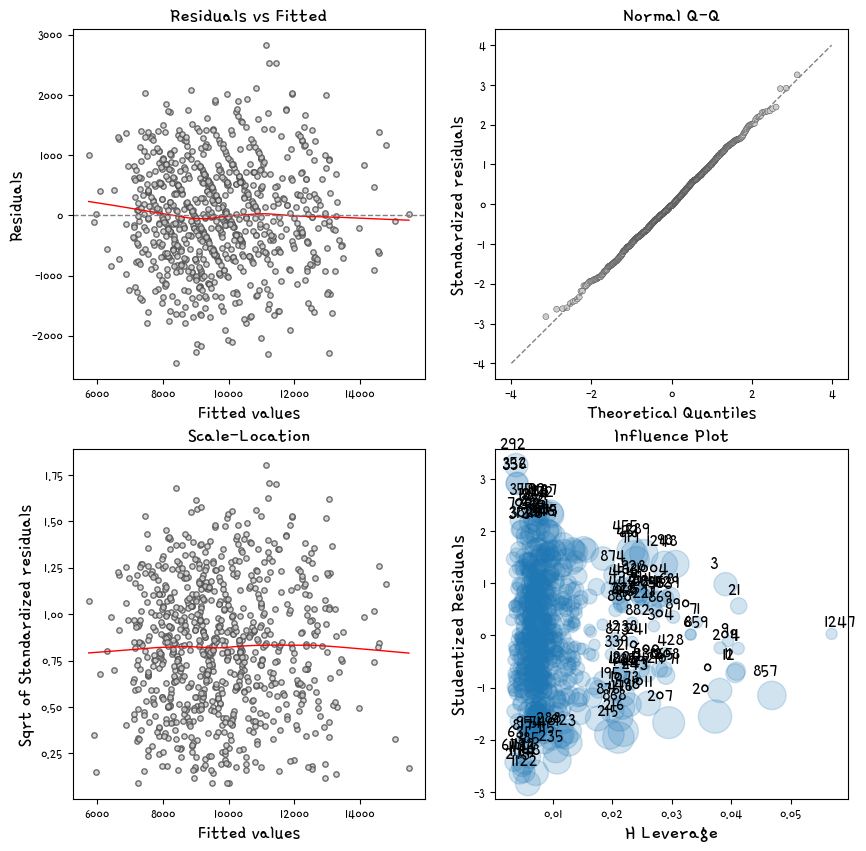

In [87]:
# fit2 모형의 잔차 그래프를 그립니다.
hds.regressionDiagnosis(model = fit2)

## [참고] 더미변수의 시각적 이해

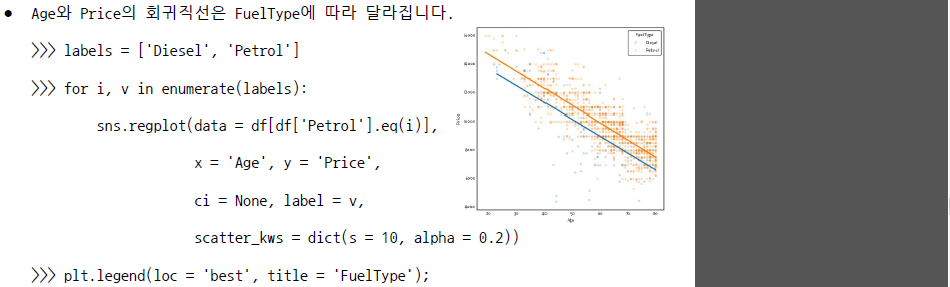

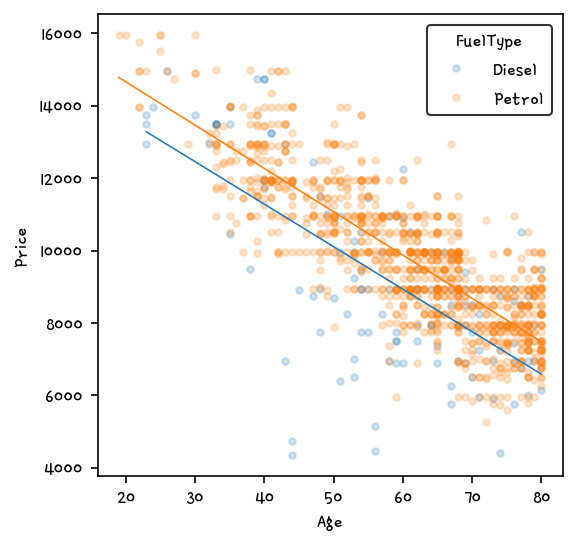

In [91]:
# Age와 Price의 회귀직선은 FuelType에 따라 달라집니다.
labels = ['Diesel', 'Petrol']
for i, v in enumerate(labels):
    sns.regplot(data = df[df['Petrol'].eq(i)], 
                x = 'Age', y = 'Price', 
                ci = None, label = v, 
                scatter_kws = dict(s = 10, alpha = 0.2))
plt.legend(loc = 'best', title = 'FuelType');

## 목표변수의 추정값 생성

### ● 훈련셋으로 fit1과 fit2 모형의 추정값을 생성하고 실제값과 비교합니다

In [58]:
trPred1 = fit1.predict(exog = trSetX)
trPred2 = fit2.predict(exog = trSetX) # fit1보다 fit2의 추정값이 실제값에 더 가깝습니다
pd.DataFrame(data = {'Real': trReal, 'Pred1': trPred1, 'Pred2': trPred2})

NameError: name 'fit1' is not defined

### ● 시험셋으로 fit1과 fit2 모형의 추정값을 생성하고 실제값과 비교합니다

In [90]:
tePred1 = fit1.predict(exog = teSetX)
tePred2 = fit2.predict(exog = teSetX)
pd.DataFrame(data = {'Real': teReal, 'Pred1': tePred1, 'Pred2': tePred2})

,Real,Pred1,Pred2
711,8250,8800.801,8845.335
898,6500,6284.139,6466.255
186,14350,11924.453,11947.344
867,6500,6801.433,6950.609
18,14900,14557.039,14479.869
...,...,...,...
881,7950,7299.861,7417.891
367,12950,11563.425,11546.141
608,8950,9845.690,9854.446
968,8750,8101.975,8135.850


## 선형 회귀모형 성능 평가

### ● 훈련셋으로 fit1과 fit2 모형의 성능지표를 출력합니다

In [92]:
hds.regmetrics(y_true = trReal, y_pred = trPred1)

,MSE,RMSE,RMSLE,MAE,MAPE
0,758864.051,871.128,0.093,700.061,0.075


In [59]:
# 훈련셋으로 fit2 모형의 성능지표를 출력합니다.
hds.regmetrics(y_true = trReal, y_pred = trPred2)

NameError: name 'trPred2' is not defined

### ● 시험셋으로 fit1과 fit2 모형의 성능지표를 출력합니다

In [94]:
# 시험셋으로 fit1 모형의 성능지표를 출력합니다.
hds.regmetrics(y_true = teReal, y_pred = tePred1)

,MSE,RMSE,RMSLE,MAE,MAPE
0,928775.181,963.73,0.105,759.234,0.081


In [104]:
# 시험셋으로 fit2 모형의 성능지표를 출력합니다.
hds.regmetrics(y_true = teReal, y_pred = tePred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,914505.621,956.298,0.103,754.909,0.081


## [참고] 회귀모형 성능지표 관련 함수(MSE, MSLE, MAE, MAPE)

### ● 관련 라이브러리를 호출합니다

In [60]:
from sklearn import metrics

### ● 회귀모형 성능지표를 출력합니다

In [97]:
# 시험셋 추정값으로 MSE를 출력합니다.
metrics.mean_squared_error(y_true = teReal, y_pred = tePred2)

914505.621

In [98]:
# 시험셋 추정값으로 MSLE를 출력합니다.
metrics.mean_squared_log_error(y_true = teReal, y_pred = tePred2)

0.011

In [99]:
# 시험셋 추정값으로 MAE를 출력합니다.
metrics.mean_absolute_error(y_true = teReal, y_pred = tePred2)

754.909

In [100]:
# 시험셋 추정값으로 MAPE를 출력합니다.
metrics.mean_absolute_percentage_error(y_true = teReal, y_pred = tePred2)

0.081

## 다중공선성 확인

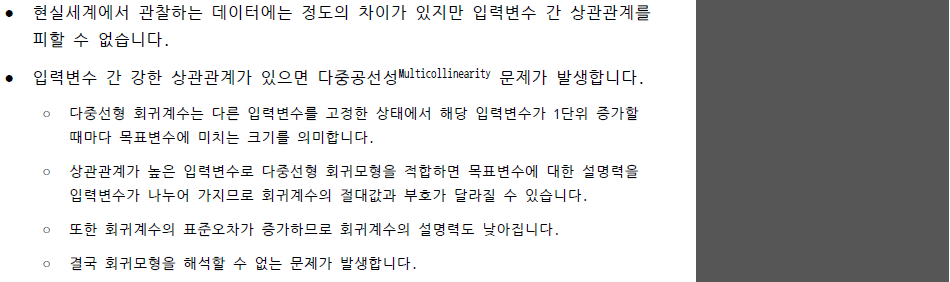

## 분산팽창지수

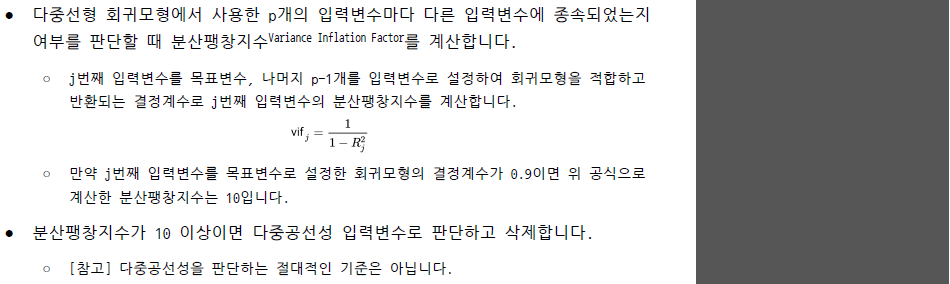

## 다중공선성 확인

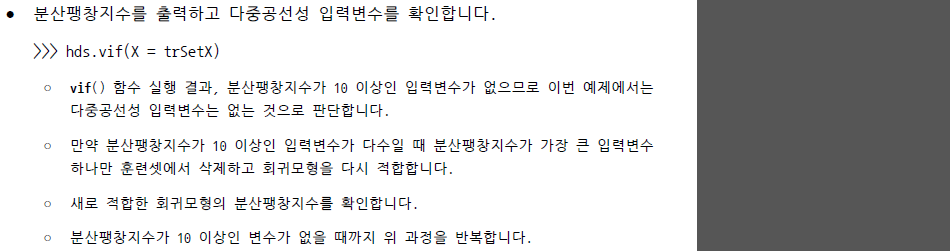

In [106]:
# 분산팽창지수를 출력하고 다중공선성 입력변수를 확인합니다.
hds.vif(X = trSetX)

,Age,KM,HP,MetColor,Doors,Weight,Petrol
0,1.278,1.525,3.117,1.015,1.668,4.661,6.113


## 다중공선성 입력변수 제거

### ● 다중공선성 입력변수가 있다고 가정하고 훈련셋에서 삭제합니다

In [62]:
trSetX1 = trSetX.drop(columns = ['Petrol'])

### ● 입력변수별 분산팽창지수를 다시 출력합니다

In [107]:
hds.vif(X = trSetX1) # [참고] 모든 입력변수의 분산팽창지수가 감소했습니다.

,Age,KM,HP,MetColor,Doors,Weight
0,1.261,1.425,1.146,1.011,1.337,1.504


## 변수선택법

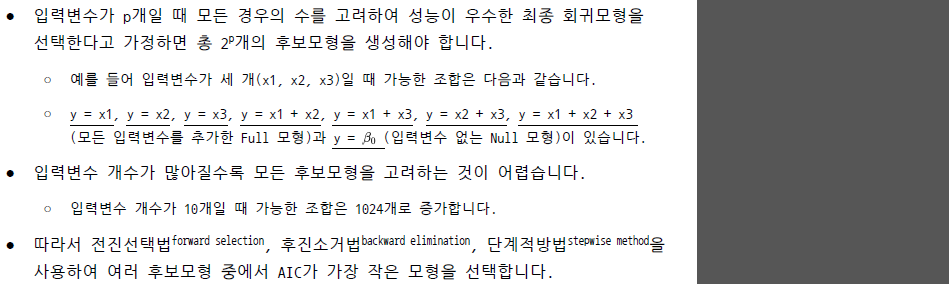

## 최적의 회귀모형 선택 기준: AIC

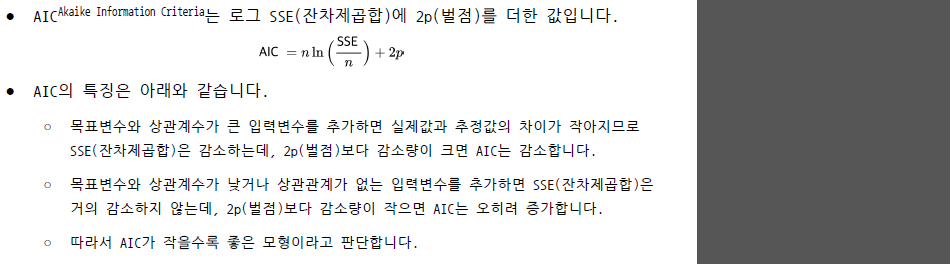

## 전진선택법

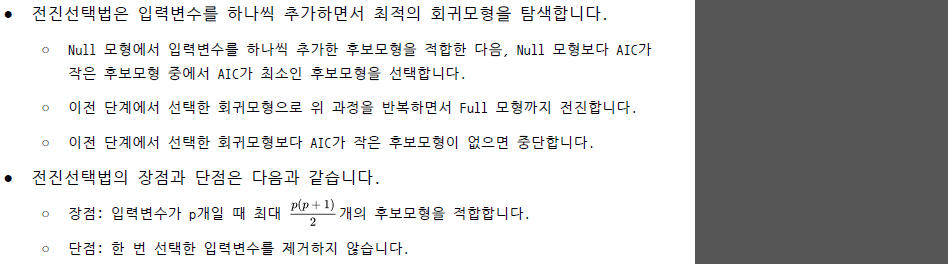

## 후진소거법

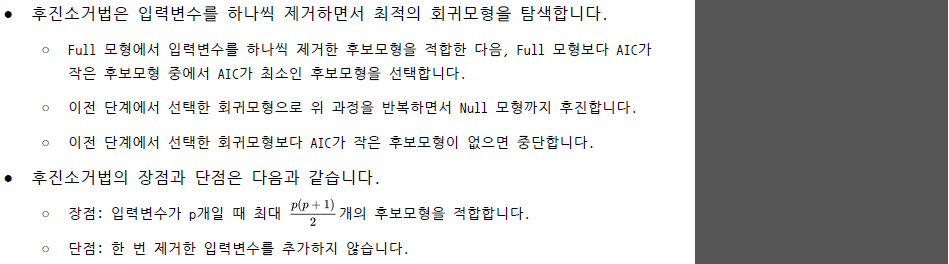

## 단계적방법

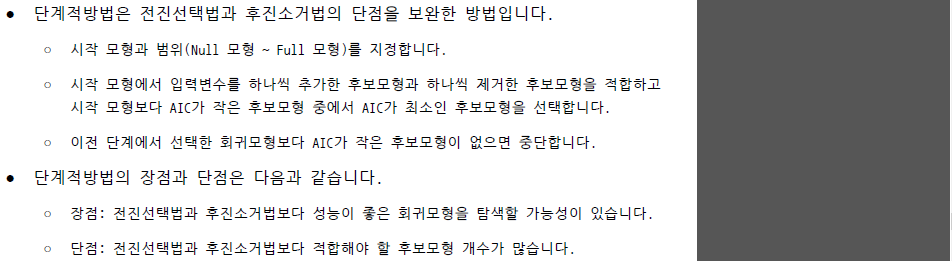

## 단계적방법으로 선형 회귀모형 적합

### ● 단계적방법으로 선형 회귀모형을 적합합니다

In [65]:
fit3 = hds.stepwise(y = trReal, X = trSetX, direction = 'both')
# direction 매개변수에 변수선택법 방향('forward', 'backward', 'both')을 문자열로 지정합니다

### ● fit3 모형의 적합 결과를 확인합니다

In [66]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     595.6
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          2.42e-247
Time:                        08:18:33   Log-Likelihood:                -7326.5
No. Observations:                 875   AIC:                         1.466e+04
Df Residuals:                     870   BIC:                         1.469e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5228.1533   1659.896     -3.150      0.002   -8486.023   -1970.284
Age          -94.5407      2.953    -32.014      0.000    -100.337     -88.745
KM            -0.0170      0.001    -12.954      0.000      -0.020      -0.014
Weight        19.4457      1.434     13.564      0.000      16.632      22.260
Petrol      1389.6530    180.627      7.693      0.000    1035.138    1744.168
==============================================================================
Omnibus:                       55.076   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.946
Skew:                          -0.316   Prob(JB):                     9.11e-32
Kurtosis:                       4.876   Cond. No.                     3.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ● fit3 모형 잔차의 등분산성 검정을 실행합니다

In [67]:
hds.breushpagan(model = fit3)

,Statistic,P-Value,F-Value,F P-Value
0,57.01,1.231e-11,15.159,5.488e-12


## 표준화 회귀계수

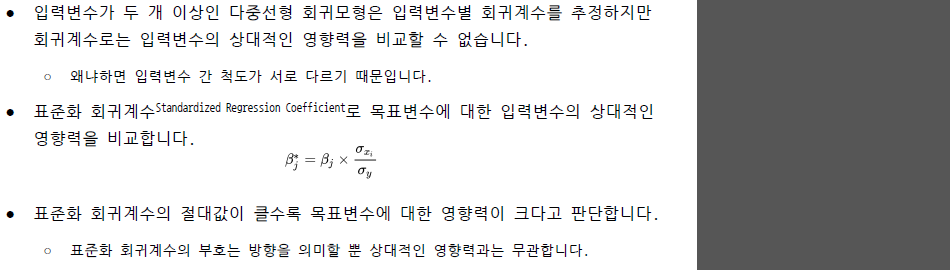

## 표준화 회귀계수 확인

### ● fit3 모형의 회귀계수를 출력합니다

In [130]:
fit3.params

Intercept   -4457.579
Age           -95.564
KM             -0.016
Weight         18.737
Petrol       1339.147
dtype: float64

### ● 표준화 회귀계수를 생성합니다

In [123]:
beta_z = hds.std_coefs(model = fit3)
beta_z

Intercept   -0.000
Age         -0.680
KM          -0.266
Weight       0.314
Petrol       0.177
dtype: float64

### ● 표준화 회귀계수의 절대값을 오름차순 정렬한 결과를 출력합니다

In [124]:
beta_z.abs().sort_values()

Intercept    0.000
Petrol       0.177
KM           0.266
Weight       0.314
Age          0.680
dtype: float64

## 회귀모형 성능 평가

### ● 시험셋으로 fit3 모형의 추정값을 생성합니다

In [127]:
tePred3 = fit3.predict(exog = teSetX)

### ● 시험셋으로 fit3 모형의 성능지표를 출력합니다

In [128]:
hds.regmetrics(y_true = teReal, y_pred = tePred3)

,MSE,RMSE,RMSLE,MAE,MAPE
0,911188.631,954.562,0.103,751.766,0.08


### ● 시험셋으로 fit2 모형의 성능지표와 비교합니다

In [131]:
hds.regmetrics(y_true = teReal, y_pred = tePred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,914505.621,956.298,0.103,754.909,0.081


## End of Document